In [1]:
from preprocessing import Preprocessor
from training import Trainer
from metrics import Metrics
import torch.nn as nn
import torch.optim as optim
from models.vgg_TL import VGG, GoogleNet, ResNet
from configuration import Hyperparameters as HP
import torch

years = [str(y) for y in range(2006, 2015)]

classes = ["detritus", "Leptocylindrus", "Chaetoceros", "Rhizosolenia", "Guinardia_delicatula", "Cerataulina", "Cylindrotheca",
    "Skeletonema", "Dactyliosolen", "Thalassiosira", "Dinobryon", "Corethron", "Thalassionema", "Ditylum", "pennate", "Prorocentrum",
    "Pseudonitzschia", "Tintinnid", "Guinardia_striata", "Phaeocystis"]

all_classes = ["mix", "detritus", "Leptocylindrus", "mix_elongated", "Chaetoceros", "dino30", "Rhizosolenia", "Guinardia_delicatula", 
"Cerataulina", "Cylindrotheca", "Skeletonema", "Ciliate_mix", "Dactyliosolen", "Thalassiosira", "bad", "Dinobryon", "Corethron", 
"DactFragCerataul" "Thalassionema", "Ditylum", "pennate", "Prorocentrum", "Pseudonitzschia", "Mesodinium_sp", "G_delicatula_parasite", 
"Tintinnid", "Guinardia_striata", "Phaeocystis", "Dictyocha", "Pleurosigma", "Eucampia", "Thalassiosira_dirty", 
"Asterionellopsis", "flagellate_sp3", "Laboea_strobila", "Chaetoceros_didymus_flagellate", "Heterocapsa_triquetra", "Guinardia_flaccida", 
"Chaetoceros_pennate", "Ceratium", "Euglena", "Coscinodiscus", "Strombidium_morphotype1", "Paralia", "Gyrodinium", "Ephemera", "Pyramimonas_longicauda", 
"Proterythropsis_sp", "Gonyaulax", "kiteflagellates", "Chrysochromulina", "Chaetoceros_didymus", "bead", "Katodinium_or_Torodinium", "Leptocylindrus_mediterraneus", 
"spore", "Tontonia_gracillima", "Delphineis", "Dinophysis", "Strombidium_morphotype2", "Licmophora", "Lauderia", "clusterflagellate", "Strobilidium_morphotype1", 
"Leegaardiella_ovalis", "pennate_morphotype1", "amoeba", "Strombidium_inclinatum", "Pseudochattonella_farcimen", "Amphidinium_sp", "dino_large1", 
"Strombidium_wulffi", "Chaetoceros_flagellate", "Strombidium_oculatum", "Cerataulina_flagellate", "Emiliania_huxleyi", "Pleuronema_sp", "Strombidium_conicum",
 "Odontella", "Protoperidinium", "zooplankton", "Stephanopyxis", "Tontonia_appendiculariformis", "Strombidium_capitatum", "Bidulphia", "Euplotes_sp", 
 "Parvicorbicula_socialis", "bubble", "Hemiaulus", "Didinium_sp", "pollen", "Tiarina_fusus", "Bacillaria", "Cochlodinium", "Akashiwo", "Karenia"]

classes_30 = ["Asterionellopsis", "bad", "Chaetoceros", "Chaetoceros_flagellate", "Ciliate_mix", "Corethron", "Cylindrotheca", "Dictyocha","dino30", "detritus",
	"Dinobryon", "Ditylum", "Eucampia", "flagellate_sp3", "Guinardia_delicatula", "Guinardia_flaccida", "Guinardia_striata", "Heterocapsa_triquetra", "Laboea_strobila", "Leptocylindrus",
	"pennate", "Phaeocystis", "Pleurosigma", "Prorocentrum", "Pseudonitzschia", "Skeletonema", "Thalassionema", "Thalassiosira", "Thalassiosira_dirty", "Tintinnid"]

print(len(classes_30))


30


In [2]:

#pp = Preprocessor(years, include_classes=classes, train_eg_per_class=HP.number_of_images_per_class)
#pp = Preprocessor(years, include_classes=all_classes, train_eg_per_class=HP.number_of_images_per_class, thresholding=HP.thresholding)
pp = Preprocessor(years, include_classes=classes_30, train_eg_per_class=HP.number_of_images_per_class, thresholding=HP.thresholding, maxN = 30000, minimum = 300)


pp.create_datasets([0.6,0.2,0.2])

trainLoader = pp.get_loaders('train', HP.batch_size)
validLoader = pp.get_loaders('validation', HP.batch_size)
testLoader = pp.get_loaders('test', HP.batch_size)


trainer = Trainer(HP_version = HP.version, epochs = HP.number_of_epochs, loss_fn = HP.loss_function, 
	optimizer = HP.optimizer, scheduler = HP.scheduler, lr = HP.learning_rate, momentum = HP.momentum, useCuda=True)

model = GoogleNet()

777655
33377
33377


In [ ]:


#trainAcc, validAcc, epochs = trainer.train(model, trainLoader, validLoader, earlyStopping = HP.es)

# - or -
pth = "../GoogleNet_1.2-6.0.pth"

model = trainer.load_full_model(model, pth)

testPred, testTarget, testFnames = trainer.test(model, testLoader)
validPred, validTarget, validFnames = trainer.test(model, validLoader)
trainPred, trainTarget, trainFnames = trainer.test(model, trainLoader)

In [ ]:
#allPred = torch.cat((testPred, validPred, trainPred), 0)
#allTarget = torch.cat((testTarget, validTarget, trainTarget), 0)

In [ ]:
testM = Metrics(testTarget, testPred)
#validM = Metrics(validTarget, validPred)
#trainM = Metrics(trainTarget, trainPred)
#allM = Metrics(allTarget, allPred)

In [ ]:
testM.class_accuracies(pp)

In [4]:
pth = "../GoogleNet_1.2-5.2.pth"
model = trainer.load_full_model(model, pth)
testPred, testTarget, testFnames = trainer.test(model, testLoader)


testM = Metrics(testTarget, testPred)
testM.class_accuracies(pp)

/home/czm/saad/urfp-hab-plankton/models/vgg_TL.py:133: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


{'Asterionellopsis': {'f1-score': 0.9189189189189189,
  'precision': 0.9622641509433962,
  'recall': 0.8793103448275862,
  'support': 58},
 'Chaetoceros': {'f1-score': 0.9301204819277108,
  'precision': 0.9018691588785047,
  'recall': 0.9601990049751243,
  'support': 402},
 'Chaetoceros_flagellate': {'f1-score': 0.19999999999999998,
  'precision': 1.0,
  'recall': 0.1111111111111111,
  'support': 36},
 'Ciliate_mix': {'f1-score': 0.946058091286307,
  'precision': 0.926829268292683,
  'recall': 0.9661016949152542,
  'support': 118},
 'Corethron': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 64},
 'Cylindrotheca': {'f1-score': 0.990353697749196,
  'precision': 0.9935483870967742,
  'recall': 0.9871794871794872,
  'support': 156},
 'Dictyocha': {'f1-score': 0.9710144927536231,
  'precision': 1.0,
  'recall': 0.9436619718309859,
  'support': 71},
 'Dinobryon': {'f1-score': 0.9774436090225564,
  'precision': 0.9701492537313433,
  'recall': 0.9848484848484849,
  'suppo

In [11]:
pth = "../GoogleNet_1.2-6.2.pth"
model = trainer.load_full_model(model, pth)
testPred, testTarget, testFnames = trainer.test(model, testLoader)
testM = Metrics(testTarget, testPred)
testM.accuracy()

/home/czm/saad/urfp-hab-plankton/models/vgg_TL.py:133: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


0.8967944877171959


0.8967944877171959

In [12]:
from metrics import load_json_from_file
x = load_json_from_file("stats-GoogleNet_1.2-6.2.json")

In [47]:
testP = x['Test_Pred']
testT = x['Test_Target']


In [48]:
testT = torch.LongTensor(testT)

tensor([10, 15, 26,  ...,  0, 23, 26], device='cuda:0')

In [51]:
testTarget = testTarget.cpu()

In [54]:
testT - testTarget

tensor([-16,   2,   0,  ..., -26,  -3,   0])

In [ ]:
pth = "../GoogleNet_1.2-6.3.pth"
model = trainer.load_full_model(model, pth)
testPred, testTarget, testFnames = trainer.test(model, testLoader)
testM = Metrics(testTarget, testPred)
testM.accuracy()

In [ ]:
pth = "../GoogleNet_1.2-6.4.pth"
model = trainer.load_full_model(model, pth)
testPred, testTarget, testFnames = trainer.test(model, testLoader)
testM = Metrics(testTarget, testPred)
testM.accuracy()

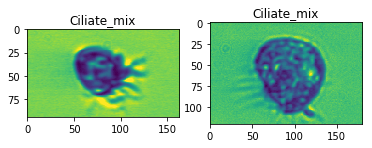

(array([3]), array([3]))

In [11]:
testM.sample(1, classname=3, fname=testFnames)

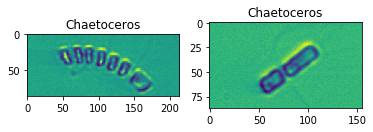

(array([1]), array([1]))

In [8]:
testM.sample(1, classname=1, fname=testFnames)

/home/czm/anaconda3/envs/redtide/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


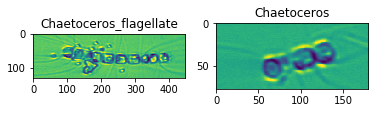

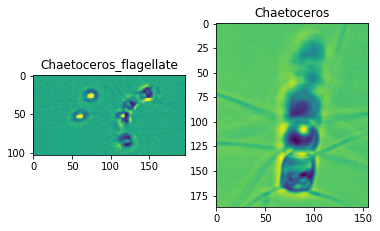

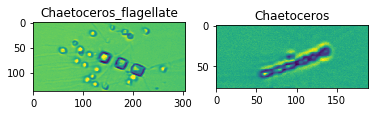

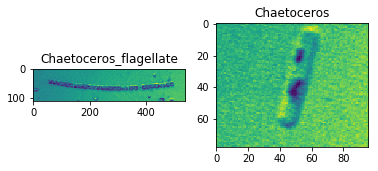

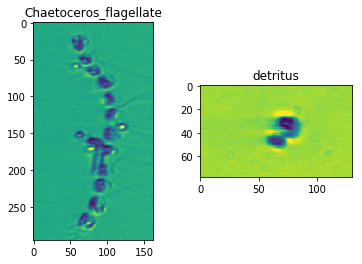

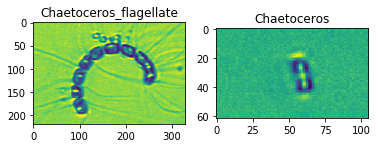

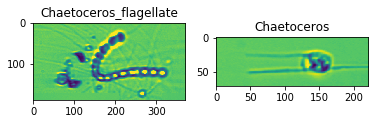

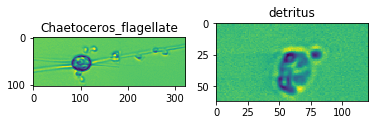

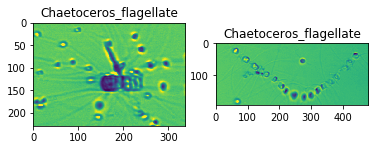

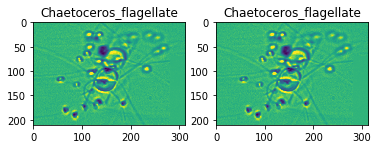

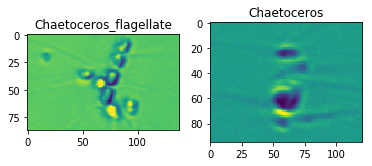

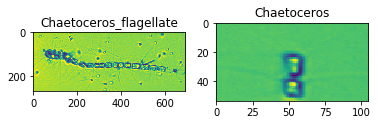

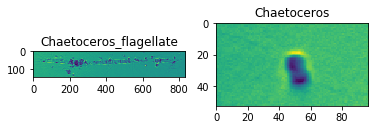

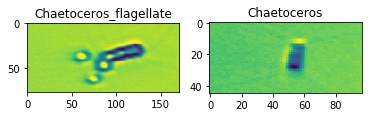

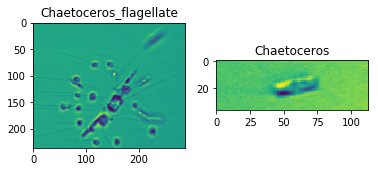

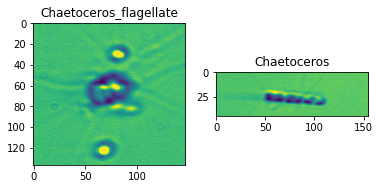

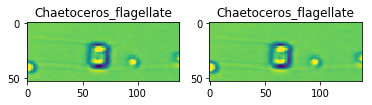

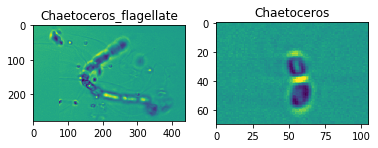

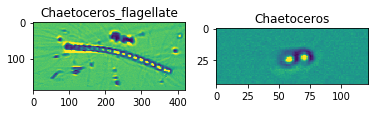

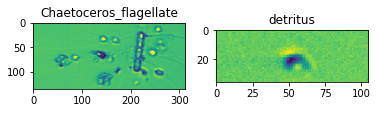

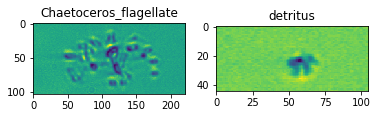

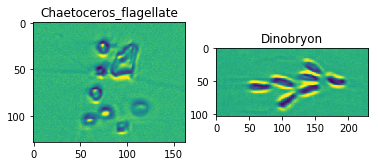

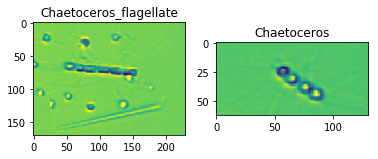

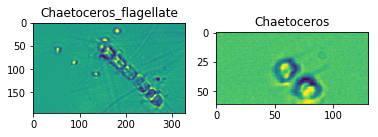

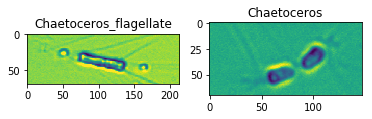

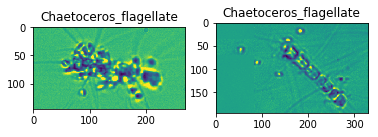

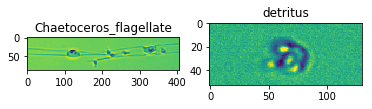

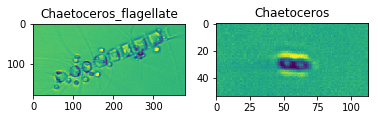

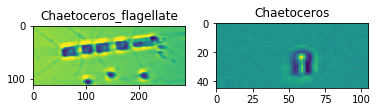

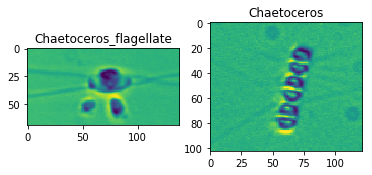

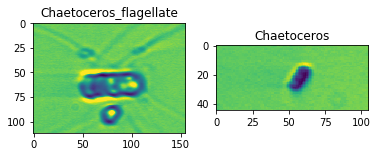

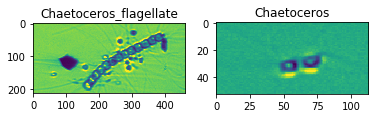

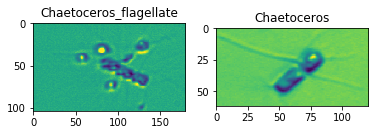

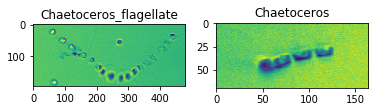

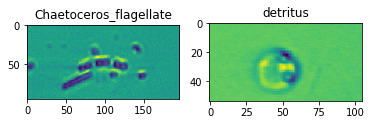

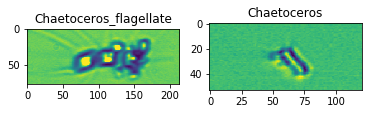

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([ 1,  1,  1,  1, 26,  1,  1, 26,  2,  2,  1,  1,  1,  1,  1,  1,  2,
         1,  1, 26, 26,  7,  1,  1,  1,  2, 26,  1,  1,  1,  1,  1,  1,  1,
        26,  1]))

In [16]:
testM.sample(36, classname=2, fname=testFnames)

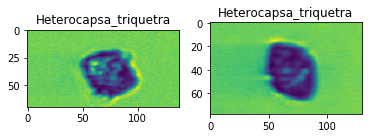

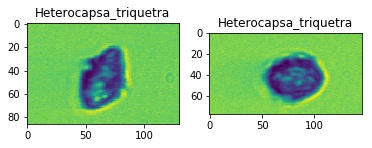

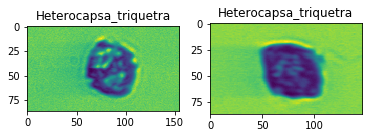

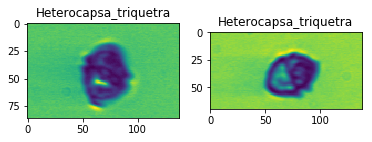

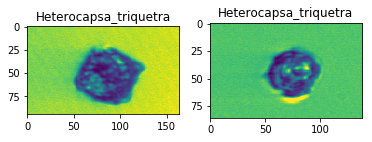

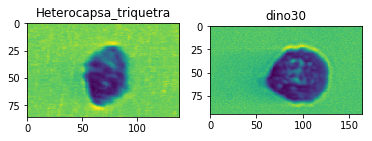

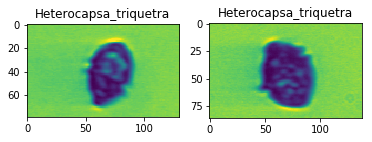

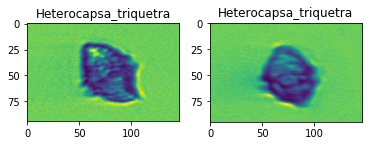

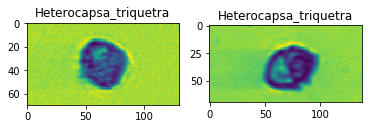

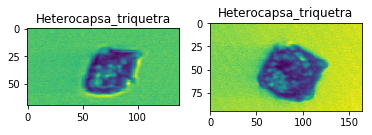

(array([13, 13, 13, 13, 13, 13, 13, 13, 13, 13]),
 array([13, 13, 13, 13, 13, 27, 13, 13, 13, 13]))

In [15]:
testM.sample(10, classname="Heterocapsa_triquetra", preprocessor=pp, fname=testFnames)

In [ ]:
trainM.sample(5, classname="Chaetoceros_flagellate", preprocessor=pp, fname=trainFnames)

In [ ]:
import numpy as np
wi = np.where(np.array(testM.target) != np.array(testM.pred))[0]

wi = np.arange(len(testM.target))

wi = wi[np.where(np.array(testM.target)[wi] == 2)[0]]
wi

In [ ]:
indxs = np.where(np.array(testM.target)==pa[0])[0]
pred_img = np.array(testFnames)[np.random.choice(indxs, size = 1)]

In [ ]:
pred_img

In [59]:
from torchvision import models
import torch
import torch.nn as nn

In [86]:
model = models.googlenet(pretrained=False)

In [87]:
t = torch.randn(8, 64,128)
t = t.reshape((8,1,64,128))
t = t.repeat(1,3,1,1)

In [88]:
class PrintLayer(nn.Module):
    def __init__(self):
        super(PrintLayer, self).__init__()
    def forward(self, x):
        print(x.shape)
        return x

class ReshapeLayer(nn.Module):
    def __init__(self):
        super(ReshapeLayer, self).__init__()
        
    def forward(self, x):
        x = 
        return x

In [91]:
model.avgpool = nn.Sequential(PrintLayer(), model.avgpool, PrintLayer())

In [92]:
model.avgpool

Sequential(
  (0): PrintLayer()
  (1): AdaptiveAvgPool2d(output_size=(1, 1))
  (2): PrintLayer()
)

In [93]:
a=model(t)

torch.Size([8, 1024, 2, 4])
torch.Size([8, 1024, 1, 1])
torch.Size([8, 1024])


In [94]:
model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
testM.sample_diff(5, classname="Thalassiosira_dirty", preprocessor = pp)

In [ ]:
testM.sample_diff(5, fname = testFnames, classname="Thalassiosira_dirty", preprocessor = pp)

In [ ]:
pp.onehotInd_to_label(26)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, transform

In [ ]:
fnames = ['./data/2009/detritus/IFCB1_2009_158_180517_02147.png', './data/2011/Leptocylindrus/IFCB1_2011_279_221512_03569.png', './data/2010/Leptocylindrus/IFCB1_2010_036_175129_01619.png', './data/2011/dino30/IFCB1_2011_218_200940_06267.png', './data/2014/Cylindrotheca/IFCB5_2014_060_062630_02950.png', './data/2006/Leptocylindrus/IFCB1_2006_272_000827_03201.png', './data/2013/detritus/IFCB5_2013_113_104613_00525.png', './data/2012/dino30/IFCB5_2012_039_201905_01802.png', './data/2006/detritus/IFCB1_2006_172_174135_03962.png']


In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
c=0
for fname in fnames:
    img = io.imread(fname)
    if c %2 == 0:
        ax1.imshow(img)
        ax1.set_title(fname)
    else:
        ax2.imshow(img)
        ax2.set_title(fname)
        fig, (ax1, ax2) = plt.subplots(1,2)
    c+=1
plt.show()

In [ ]:
testM.plot_CM()

In [ ]:
trainM.plot_CM()

In [ ]:
validM.plot_CM()

In [ ]:
test_pred, test_target = testPred, testTarget
valid_pred, valid_target = validPred, validTarget
train_pred, train_target = trainPred, trainTarget

In [ ]:
f= open("predtarget-"+str(model)+"-"+str(HP.version)+".json","w+")
str_to_write = "{\"Train_Pred\": " + str(list(train_pred.cpu().numpy())) + ", \"Train_Target\": " + str(list(train_target.cpu().numpy())) + ", \"Valid_Pred\": " + str(list(valid_pred.cpu().numpy())) + ", \"Valid_Target\": " + str(list(valid_target.cpu().numpy())) + ", \"Test_Pred\": " + str(list(test_pred.cpu().numpy())) + ", \"Test_Target\": " + str(list(test_target.cpu().numpy())) + "}"
f.write(str_to_write)
f.close()

In [ ]:
uniq_classes = set(target.tolist())
class_names = []
for cl in uniq_classes:
    print(cl)
    class_names.append(pp.onehot_to_label(cl))


In [ ]:
from sklearn.metrics import classification_report
ca_dic = classification_report(target.tolist(), pred.tolist(), target_names=class_names, output_dict=True)

In [ ]:
ca_dic

In [ ]:

#f= open("stats-"+str(model)+"-"+str(HP.version)+".json","w+")
str_to_write = "{\"Epochs\": "+str(epochs)+ ", \"TrainAcc\": "+ str(trainAcc)+", \"ValidAcc\": "+str(validAcc)+", \"TestAcc\": "+str(met.accuracy())+"}"
#str_to_write = "{\"Pred\": "+str(list(pred.cpu().numpy()))+", \"Target\": "+str(list(target.cpu().numpy()))+"}"
f.write(str_to_write)
f.close()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/2006/Thalassiosira/IFCB1_2006_158_000036_00309.png',0)

edges = cv2.Canny(img,20,100)

bilateral = cv2.bilateralFilter(img, 9,75,75) # 9,75,75 
scharr1 = cv2.Scharr(bilateral, -1, 0, 1) # (src, ddepth, dx, dy[, dst[, scale[, delta[, borderType]]]])
scharr2 = cv2.Scharr(bilateral, -1, 1, 0) # (src, ddepth, dx, dy[, dst[, scale[, delta[, borderType]]]])


img1 = scharr1 + scharr2 

  


def contrast_increaser(x):
    if x > 10:
        x = x*2.5
        if x > 255:
            x = 255
    else:
        x = x*0.4
    return x

cf = np.vectorize(contrast_increaser)
img2 = cf(img1)




In [ ]:
from torchvision import models
m = models.resnet50()
m

In [ ]:
m.fc